<a href="https://colab.research.google.com/github/random-words/colab-notebooks/blob/main/03__convolutional_neural_network_and_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Get data

In [6]:
# Get data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-27 23:44:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.207, 142.251.8.207, 142.251.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  27.5MB/s    in 5.1s    

2025-01-27 23:44:31 (20.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Data visualization

In [2]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os

# walk trough file and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(dirnames)} images in {dirpath}")

There are 2 directories and 2 images in pizza_steak
There are 2 directories and 2 images in pizza_steak/train
There are 0 directories and 0 images in pizza_steak/train/steak
There are 0 directories and 0 images in pizza_steak/train/pizza
There are 2 directories and 2 images in pizza_steak/test
There are 0 directories and 0 images in pizza_steak/test/steak
There are 0 directories and 0 images in pizza_steak/test/pizza


In [8]:
# Another way to tell how many files are in derectory
len(os.listdir("pizza_steak/train/steak"))

750

In [11]:
# Get the classnames programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [15]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['663014.jpg']
Image shape: (512, 512, 3)


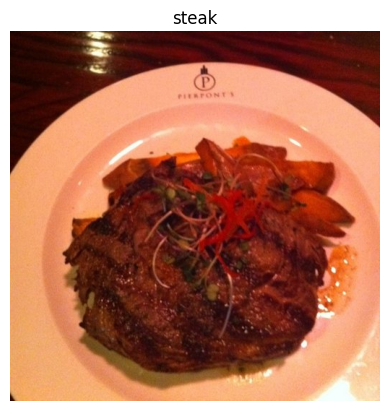

In [20]:
img = view_random_image("pizza_steak/train/", "steak")

array([[[ 24,   3,   0],
        [ 25,   4,   1],
        [ 26,   5,   2],
        ...,
        [ 59,  16,   9],
        [ 60,  17,   8],
        [ 59,  16,   7]],

       [[ 26,   2,   0],
        [ 24,   3,   0],
        [ 27,   3,   1],
        ...,
        [ 58,  15,   6],
        [ 58,  15,   6],
        [ 57,  14,   5]],

       [[ 28,   3,   0],
        [ 28,   4,   0],
        [ 29,   4,   0],
        ...,
        [ 58,  15,   6],
        [ 59,  16,   7],
        [ 57,  15,   3]],

       ...,

       [[ 47,  11,  11],
        [ 47,  12,   8],
        [ 48,  10,   0],
        ...,
        [249, 214, 174],
        [254, 216, 177],
        [251, 213, 174]],

       [[ 48,  14,  15],
        [ 48,  13,  11],
        [ 49,  11,   2],
        ...,
        [250, 215, 173],
        [246, 208, 169],
        [248, 210, 171]],

       [[ 46,  11,  15],
        [ 44,   8,   8],
        [ 48,  11,   3],
        ...,
        [251, 216, 174],
        [244, 206, 167],
        [250, 212, 173]]], dtype=uint8)
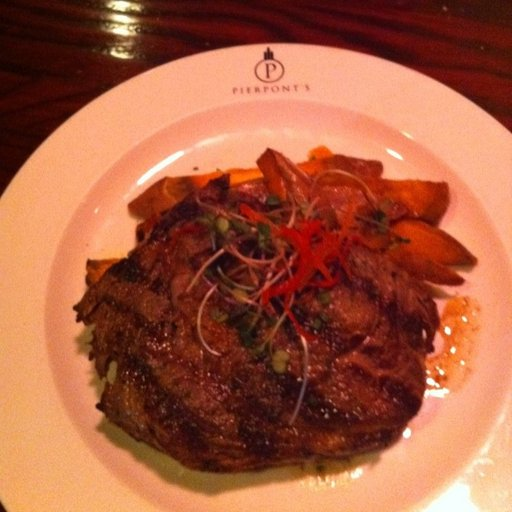

In [21]:
img

In [27]:
import tensorflow as tf
img = tf.cast(tf.constant(img), tf.float32)
img

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[ 24.,   3.,   0.],
        [ 25.,   4.,   1.],
        [ 26.,   5.,   2.],
        ...,
        [ 59.,  16.,   9.],
        [ 60.,  17.,   8.],
        [ 59.,  16.,   7.]],

       [[ 26.,   2.,   0.],
        [ 24.,   3.,   0.],
        [ 27.,   3.,   1.],
        ...,
        [ 58.,  15.,   6.],
        [ 58.,  15.,   6.],
        [ 57.,  14.,   5.]],

       [[ 28.,   3.,   0.],
        [ 28.,   4.,   0.],
        [ 29.,   4.,   0.],
        ...,
        [ 58.,  15.,   6.],
        [ 59.,  16.,   7.],
        [ 57.,  15.,   3.]],

       ...,

       [[ 47.,  11.,  11.],
        [ 47.,  12.,   8.],
        [ 48.,  10.,   0.],
        ...,
        [249., 214., 174.],
        [254., 216., 177.],
        [251., 213., 174.]],

       [[ 48.,  14.,  15.],
        [ 48.,  13.,  11.],
        [ 49.,  11.,   2.],
        ...,
        [250., 215., 173.],
        [246., 208., 169.],
        [248., 210., 171.]],

       [[ 46.,  1

In [28]:
# Scale image values to be between 0 & 1
img / 255.

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.09411765, 0.01176471, 0.        ],
        [0.09803922, 0.01568628, 0.00392157],
        [0.10196079, 0.01960784, 0.00784314],
        ...,
        [0.23137255, 0.0627451 , 0.03529412],
        [0.23529412, 0.06666667, 0.03137255],
        [0.23137255, 0.0627451 , 0.02745098]],

       [[0.10196079, 0.00784314, 0.        ],
        [0.09411765, 0.01176471, 0.        ],
        [0.10588235, 0.01176471, 0.00392157],
        ...,
        [0.22745098, 0.05882353, 0.02352941],
        [0.22745098, 0.05882353, 0.02352941],
        [0.22352941, 0.05490196, 0.01960784]],

       [[0.10980392, 0.01176471, 0.        ],
        [0.10980392, 0.01568628, 0.        ],
        [0.11372549, 0.01568628, 0.        ],
        ...,
        [0.22745098, 0.05882353, 0.02352941],
        [0.23137255, 0.0627451 , 0.02745098],
        [0.22352941, 0.05882353, 0.01176471]],

       ...,

       [[0.18431373, 0.04313726, 0.04313726],
        [0.18

## An end-to-end example

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Set random seed
tf.random.set_seed(42)

# Preprocess data (to be between 0 & 1, a.k.a. scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to files
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [2]:
# Build a CNN Model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3),),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    # break down conv layer and its activation function into 2 lines of code
    tf.keras.layers.Conv2D(10, 3),
    tf.keras.layers.Activation(tf.nn.relu)

    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
len(train_data)

47

In [38]:
# all of the train data / batch size
1500 / 32

46.875

In [5]:
# Fit model
# just train_data and not X & y, because train_data object
# already do that splitting for us
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.5695 - loss: 0.6697 - val_accuracy: 0.7900 - val_loss: 0.4695
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.7841 - loss: 0.4660 - val_accuracy: 0.8580 - val_loss: 0.3536
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8268 - loss: 0.3925 - val_accuracy: 0.8680 - val_loss: 0.3414


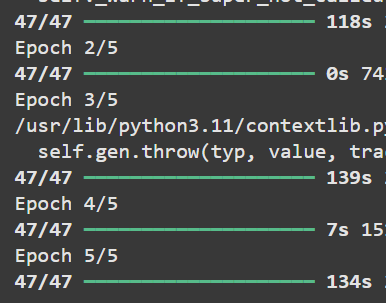

In [6]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using tha same model as before

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create a model, that built before for classification problem
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)

history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.5124 - loss: 0.7275 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [10]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [12]:
# Upgrading model_2: adding more layers and units

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.5642 - loss: 8.2763 - val_accuracy: 0.6740 - val_loss: 1.6062
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6793 - loss: 1.8555 - val_accuracy: 0.7120 - val_loss: 0.5620
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7554 - loss: 0.5927 - val_accuracy: 0.6380 - val_loss: 0.7760


In [13]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)